In [1]:
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Loading the train.csv

In [2]:
TRAIN_CSV = Path('Artifacts/train.csv')

In [3]:
sales_df = pd.read_csv(TRAIN_CSV)
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Getting More Information about train.csv

In [4]:
sales_df.shape

(8523, 12)

In [5]:
sales_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
sales_df.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [8]:
sales_df["Outlet_Establishment_Year"] = sales_df.Outlet_Establishment_Year.astype('object')
sales_df.Outlet_Establishment_Year.nunique()

9

#### `"Outlet_Establishment_Year" changed to object because it contains only 9 unique years only`
* OUT049 --> 1999
* OUT018 --> 2009

In [9]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


# Checking for Nan values

In [10]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
sales_df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### `"Item_weight" has approx. 17% missing values and "Outlet_Size" has approx. 28% missing values which are greater than 5%, these need to be imputed for further analysis`

# Imputing the missing values for "Outlet_Size"

In [12]:
import matplotlib.pyplot as plt

In [13]:
print("Outlet_Size : ",sales_df["Outlet_Size"].dtype)

Outlet_Size :  object


In [14]:
sales_df.Outlet_Size.isnull().sum()

2410

In [15]:
sales_df.Outlet_Size.isnull().mean()*100

28.27642848762173

In [16]:
sales_df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
sales_df.Outlet_Size.value_counts(dropna=False)

Outlet_Size
Medium    2793
NaN       2410
Small     2388
High       932
Name: count, dtype: int64

#### `Two Imputation techniques to find missing values: `
#### `1. Random Sample`
#### `2. Making seperate category named as "Others"`

#### `We will choose the best technique based on our results ` 

In [18]:
without_Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False]
without_Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [19]:
Nan_Outlet_size = sales_df[sales_df.Outlet_Size.isnull()]
Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


## Random Sample Imputation

In [20]:
 random_sampled_Outlet_size = sales_df[sales_df.Outlet_Size.isnull() == False].sample(2410).Outlet_Size.values
 random_sampled_Outlet_size

array(['High', 'High', 'High', ..., 'Medium', 'Medium', 'Small'],
      dtype=object)

In [21]:
Nan_Outlet_size["Outlet_Size"] = random_sampled_Outlet_size
Nan_Outlet_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,High,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,High,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Medium,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344


In [22]:
imputed_outlet_size = pd.concat([without_Nan_Outlet_size,Nan_Outlet_size])
imputed_outlet_size.shape

(8523, 12)

In [23]:
imputed_outlet_size.Outlet_Size.isnull().mean()*100

0.0

## Checking for Distribution of "Item_Outlet_Sales" for each "Outlet_Size" category before imputation and after imputation

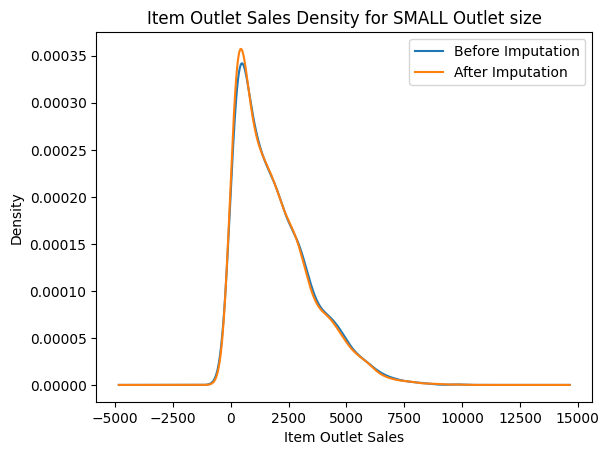

In [24]:
sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for SMALL Outlet size")
plt.legend()

#### `"Item_Outlet_Sales" distribution for SMALL "outlet_size" is same after the imputation as seen from the overlapping`

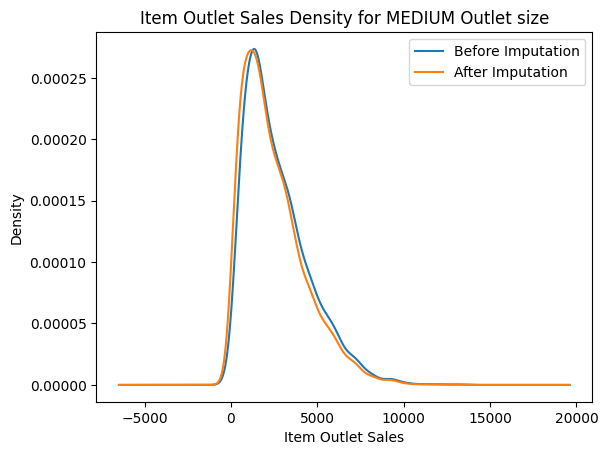

In [25]:
sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for MEDIUM Outlet size")
plt.legend()

#### `"Item_Outlet_Sales" distribution for MEDIUM "outlet_size" is same after the imputation as seen from the overlapping`

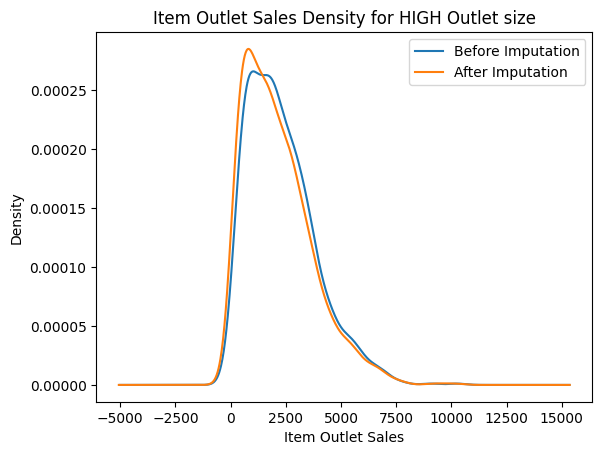

In [26]:
sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='Before Imputation')
imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].plot.kde(label='After Imputation')
plt.xlabel("Item Outlet Sales")
plt.title("Item Outlet Sales Density for HIGH Outlet size")
plt.legend()

#### `"Item_Outlet_Sales" distribution for HIGH "outlet_size" is same after the imputation as seen from the overlapping`

## Checking for change in variance in "Item_Outlet_Sales" for each "Outlet_Size" category after imputation

In [27]:
before_imputation = sales_df[sales_df.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Small']['Item_Outlet_Sales'].describe()['std']

print(f"=====SMALL OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====SMALL OUTLET SIZE======
Before Imputation Variance : 2503895.9696139977
After Imputation Variance : 2471534.866581577


In [28]:
before_imputation = sales_df[sales_df.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='Medium']['Item_Outlet_Sales'].describe()['std']

print(f"=====MEDIUM OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====MEDIUM OUTLET SIZE======
Before Imputation Variance : 3441806.1034910944
After Imputation Variance : 3292249.7029418726


In [29]:
before_imputation = sales_df[sales_df.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']
after_imputation = imputed_outlet_size[imputed_outlet_size.Outlet_Size=='High']['Item_Outlet_Sales'].describe()['std']

print(f"=====HIGH OUTLET SIZE======")
print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

=====HIGH OUTLET SIZE======
Before Imputation Variance : 2351719.364319561
After Imputation Variance : 2415099.325567057


# # Imputing the missing values for "Item_weight"

In [30]:
imputed_outlet_size.Item_Weight.isnull().sum()

1463

In [31]:
imputed_outlet_size.Item_Weight.isnull().mean()*100

17.165317376510618

In [32]:
print("Item_Weight : ",imputed_outlet_size["Item_Weight"].dtype)

Item_Weight :  float64


In [33]:
imputed_outlet_size.shape

(8523, 12)

In [34]:
without_Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()==False]
without_Nan_Item_weight.shape

(7060, 12)

In [35]:
Nan_Item_weight = imputed_outlet_size[imputed_outlet_size.Item_Weight.isnull()]
Nan_Item_weight.shape

(1463, 12)

In [36]:
without_Nan_Item_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [37]:
Nan_Item_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


## Detecting outliers --> It has issue while using mean imputation

Text(0, 0.5, 'Item weight')

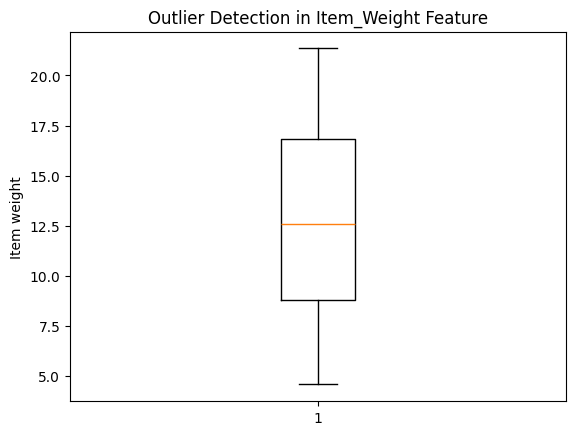

In [38]:
plt.boxplot(without_Nan_Item_weight["Item_Weight"])
plt.title("Outlier Detection in Item_Weight Feature")
plt.ylabel("Item weight")

#### `No Outlier present in "Item_Weight"`

In [39]:
random_sampled_Item_Weight= without_Nan_Item_weight.Item_Weight.sample(1463).values
random_sampled_Item_Weight

array([ 9.5  , 16.2  ,  8.97 , ..., 11.35 , 19.   ,  6.235])

In [40]:
Nan_Item_weight["Item_Weight"] = random_sampled_Item_Weight
Nan_Item_weight["Item_Weight"].head()

7      9.50
18    16.20
21     8.97
23     7.59
29    17.35
Name: Item_Weight, dtype: float64

In [41]:
Imputed_Item_Weight = pd.concat([without_Nan_Item_weight,Nan_Item_weight])
Imputed_Item_Weight.Item_Weight.isnull().mean()*100

0.0

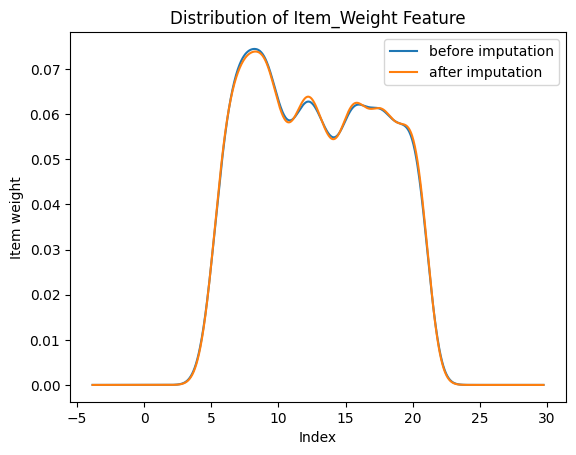

In [42]:
without_Nan_Item_weight.Item_Weight.plot.kde(label = "before imputation")
Imputed_Item_Weight.Item_Weight.plot.kde(label = "after imputation")
plt.title("Distribution of Item_Weight Feature")
plt.ylabel("Item weight")
plt.xlabel("Index")
plt.legend()

#### `"Item_Outlet_Sales" distribution for "Item_Weight" is same after the imputation as seen from the overlapping`

## Checking for change in variance in "Item_Outlet_Sales" for each "Item_Weight" after imputation

In [43]:
before_imputation = without_Nan_Item_weight['Item_Weight'].describe()['std']
after_imputation = Imputed_Item_Weight['Item_Weight'].describe()['std']

print(f"Before Imputation Variance : {before_imputation**2}")
print(f"After Imputation Variance : {after_imputation**2}")

Before Imputation Variance : 21.56168825983656
After Imputation Variance : 21.587925640419588


## Checking for change in Correlation with other numerical features with "Item_Weight" after imputation

In [44]:
before_imputation_correlation = without_Nan_Item_weight.select_dtypes(exclude='object').corr().iloc[:1,1:]
before_imputation_correlation

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,-0.014048,0.027141,0.014123


In [45]:
after_imputation_correlation = Imputed_Item_Weight.select_dtypes(exclude='object').corr().iloc[:1,1:]
after_imputation_correlation

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,-0.008677,0.016359,0.015621


In [46]:
after_imputation_correlation - before_imputation_correlation

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,0.005371,-0.010782,0.001499


#### `There is not large change in correlation of other features with "Item_Weight"`

# Feature Analysis (Numerical)

In [47]:
Imputed_sales_df = Imputed_Item_Weight.copy()
Imputed_sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


## Segregating Numerical and Object categorical Features

In [48]:
numerical_columns = Imputed_sales_df.select_dtypes(exclude='object').columns
categorical_columns = Imputed_sales_df.select_dtypes(include='object').columns

In [49]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [50]:
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

## Univariate Analysis

In [51]:
import numpy as np
import seaborn as sns

In [52]:
Imputed_sales_df[numerical_columns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.877464,0.066132,140.992782,2181.288914
std,4.646281,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.785000,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


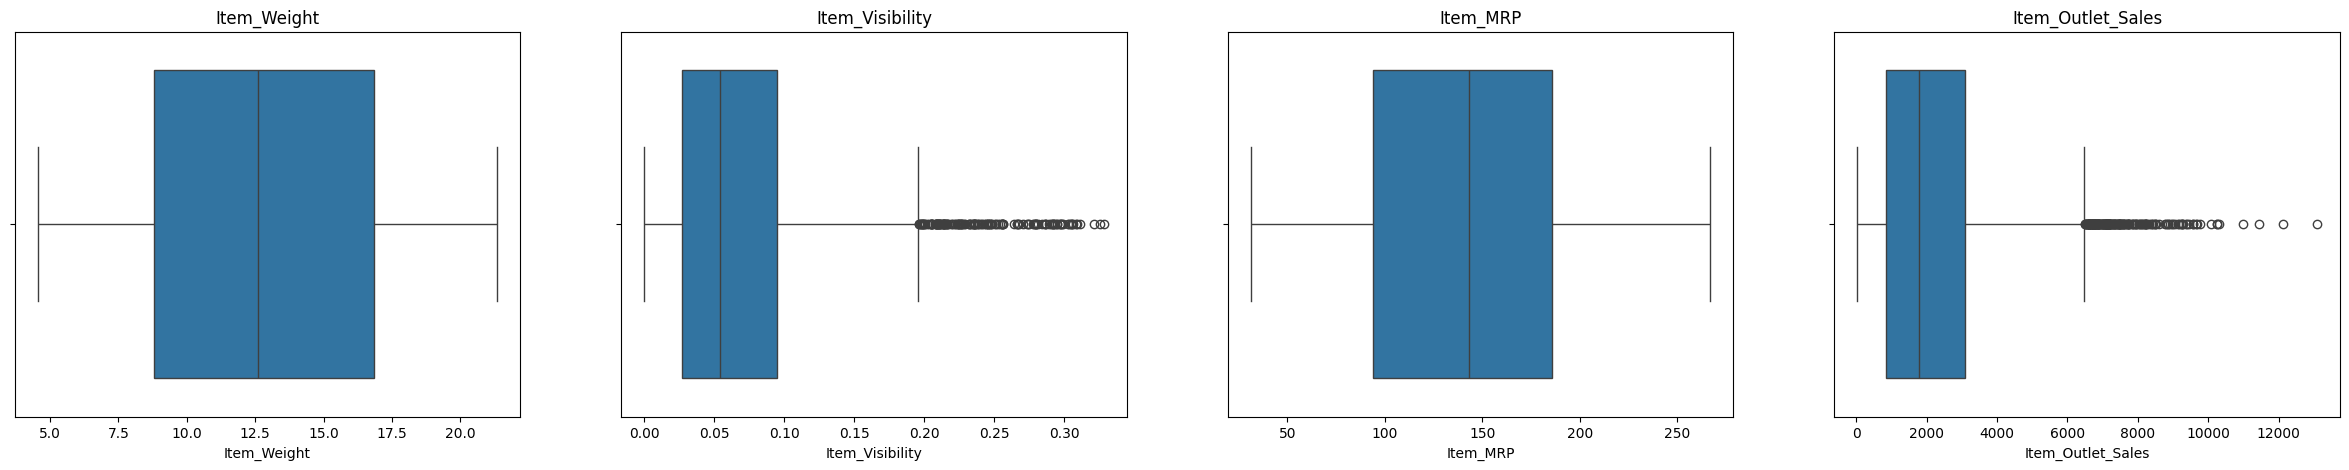

In [54]:
plt.figure(figsize = (30,5))

for idx,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),idx+1)
    sns.boxplot(data = Imputed_sales_df,x = col)
    plt.title(col)
    plt.xlabel(col)

#### `"Outliers found in "Item_Visisbility" and "Item_Outet_Sales", where "Item_Outet_Sales" is our dependent variable so we will only treat the outliers of "Item_Visibility"`

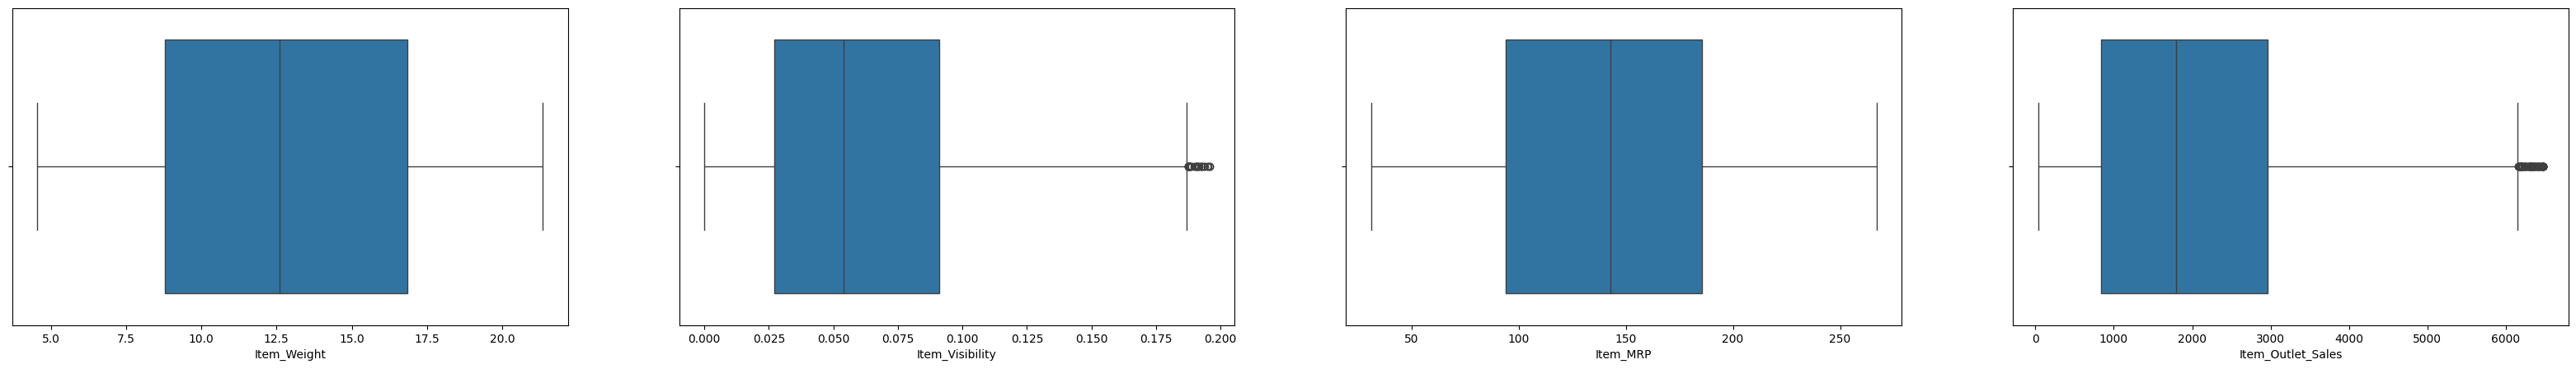

In [55]:
plt.figure(figsize=(40,5))

for idx,col in enumerate(numerical_columns):

    q1 = Imputed_sales_df[col].quantile(0.25)
    q3 = Imputed_sales_df[col].quantile(0.75)

    iqr = q3-q1

    upper = q3+1.5*iqr
    lower = q1-1.5*iqr

    data = Imputed_sales_df[(lower<Imputed_sales_df[col]) & (Imputed_sales_df[col]<upper)]

  
    Imputed_sales_df[col] = np.where(Imputed_sales_df[col]>upper,data[col].sample(1),
                    np.where(Imputed_sales_df[col]<lower,data[col].sample(1),Imputed_sales_df[col]))

    
    plt.subplot(1,4,idx+1) 
    sns.boxplot(data = Imputed_sales_df,x = col)                

<Axes: xlabel='Item_Weight', ylabel='Count'>

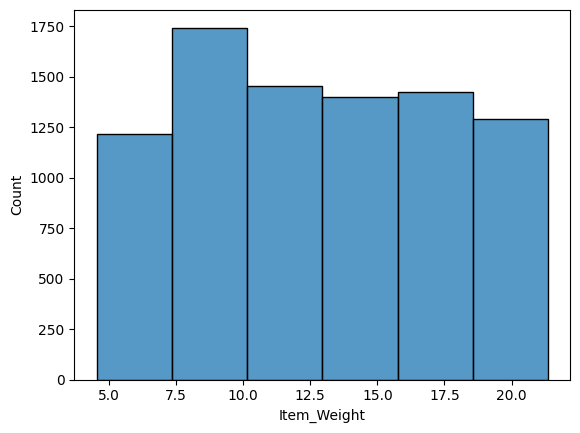

In [56]:
sns.histplot(Imputed_sales_df["Item_Weight"],binwidth=3)

<Axes: xlabel='Item_Visibility', ylabel='Count'>

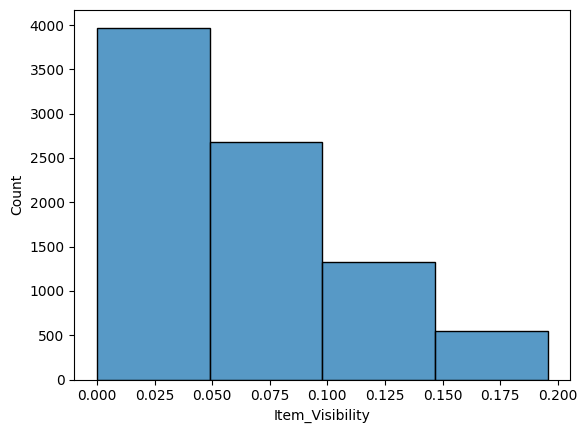

In [57]:
sns.histplot(Imputed_sales_df["Item_Visibility"],bins = 4)

<Axes: xlabel='Item_MRP', ylabel='Count'>

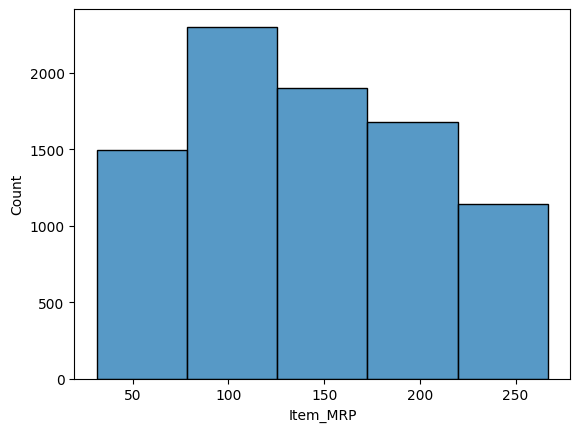

In [58]:
sns.histplot(Imputed_sales_df["Item_MRP"],binwidth=50)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

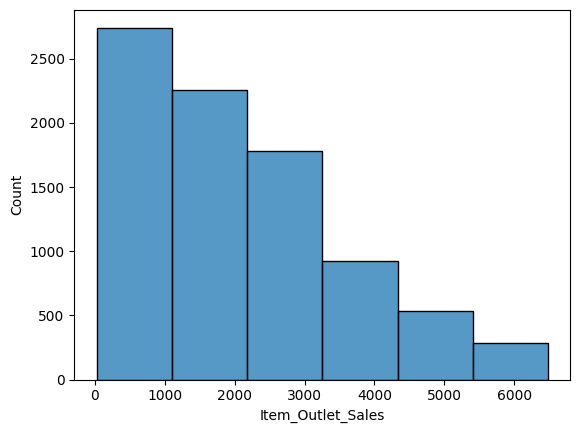

In [59]:
sns.histplot(Imputed_sales_df["Item_Outlet_Sales"],binwidth=1000)

#### `People used to buy more items which has :`
* "Item_Weight" between 7.5 and 10
* "Item_Visibility" between 0.02 and 0.05
* "Item_MRP" in range of 80-130

#### `Highest "Item_Outlet_Sales" is in range of 0 and 1000`

## Bivariate Analysis

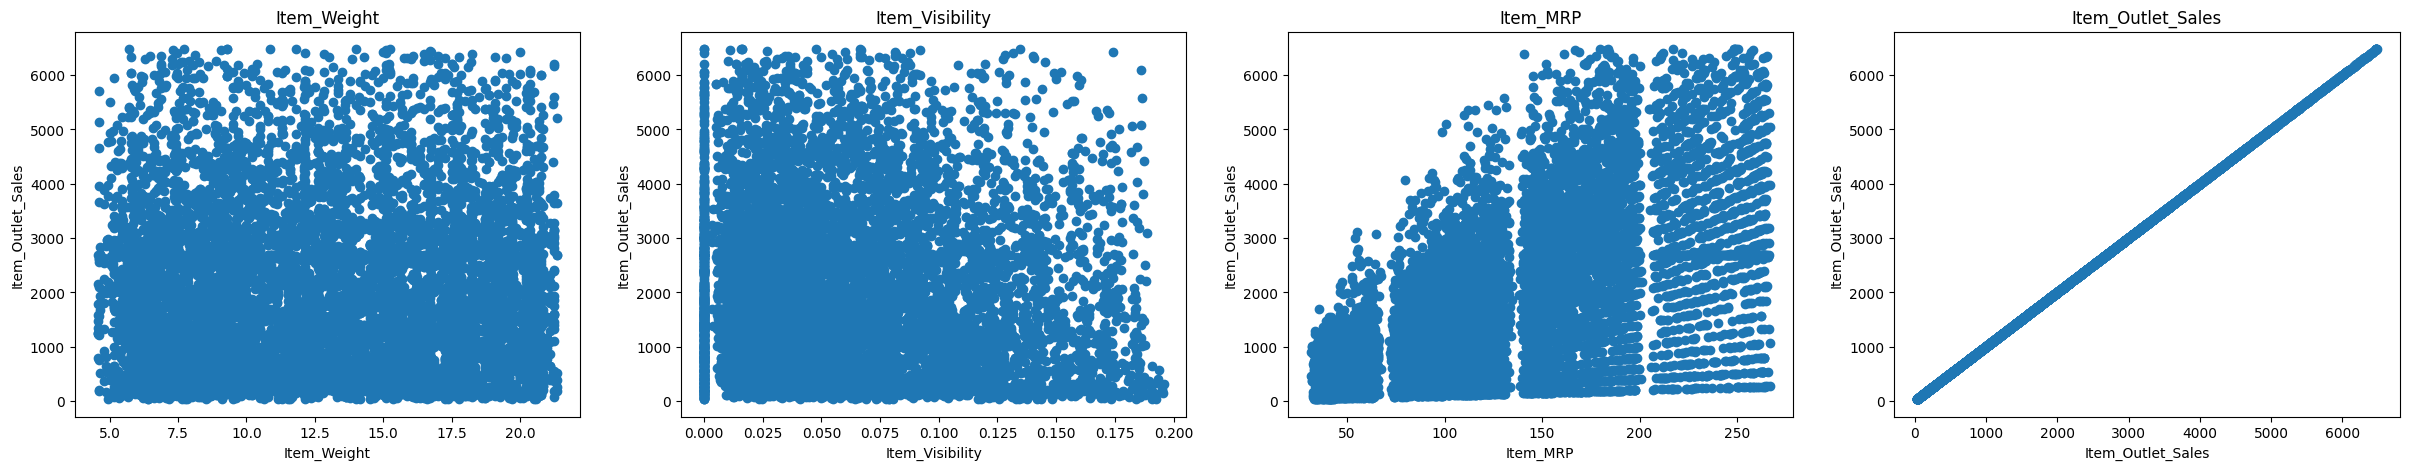

In [62]:
plt.figure(figsize = (30,5))

for idx,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),idx+1)

    x = Imputed_sales_df[col]
    y =  Imputed_sales_df["Item_Outlet_Sales"]
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Item_Outlet_Sales")

#### `"Item_Outlet_Sales" seems to be not much dependable on "Item_Weight"`
#### `"Item_Outlet_Sales" is less for "Item_Visibility" >= 0.19 approx. and these are very less in number`
#### `"Item_Outlet_Sales" is increasing gradually with increase in "Item_MRP`
#### `"Item_Outlet_Sales" are most less than 8000`

## Multivariate Analysis

In [63]:
import seaborn as sns 

<Axes: >

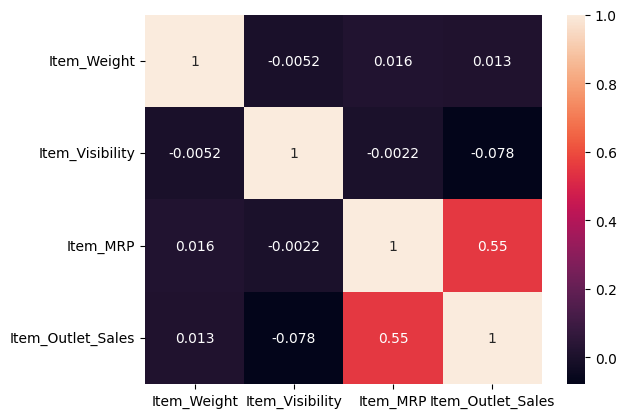

In [64]:
sns.heatmap(Imputed_sales_df[numerical_columns].corr(),annot=True)

#### `Highest correlation is between Item_MRP and Item_Outlet_Sales i.e. 0.55`

# Feature Analysis (Categorical)

In [65]:
Imputed_sales_df[categorical_columns].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
4,NCD19,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1
5,FDP36,Regular,Baking Goods,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [66]:
Imputed_sales_df.drop("Item_Identifier",axis=1,inplace=True)
Imputed_sales_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [67]:
categorical_columns = Imputed_sales_df.select_dtypes(include='object').columns
categorical_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

#### `Dropped "Item_Identifier" due to risk at production level testing, which can be done for different Item Identifier which is not in "Item_Identifier"`

## Univariate Analysis

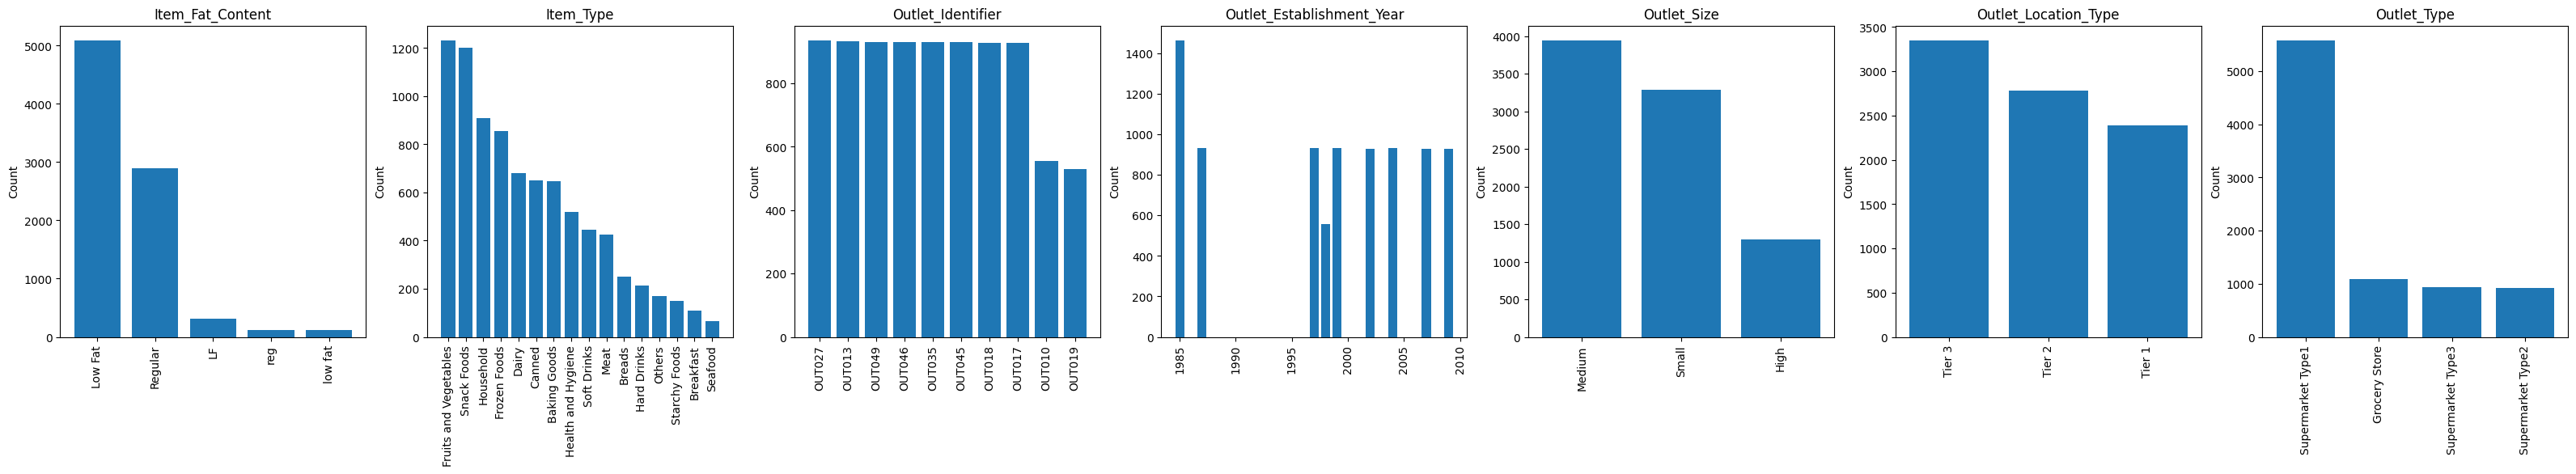

In [68]:
plt.figure(figsize = (40,5))

for idx,col in enumerate(categorical_columns):
    plt.subplot(1,7,idx+1)
    x = Imputed_sales_df[col].value_counts().index.values
    y = Imputed_sales_df[col].value_counts()
    plt.bar(x,y)
    plt.title(col)
    plt.ylabel("Count")
    plt.xticks(rotation = 90)                   

#### `People used to buy more Items :`
*  which contains "Low Fat" and "Regular" Item_Fat_Content
*  which are "Fruits and vegetables" and "Snack Food" Item_Type
*  Which does not have Item_Identifier of OUT010 and OUT019
*  from oldest Outlet which has 1985 as establishment year 
*  Whose Outlet_Size is not "High" 
*  Whose Outlet_Location_Type is "Tier 3"
*  from "Supermarket Type1" Outlet_Type

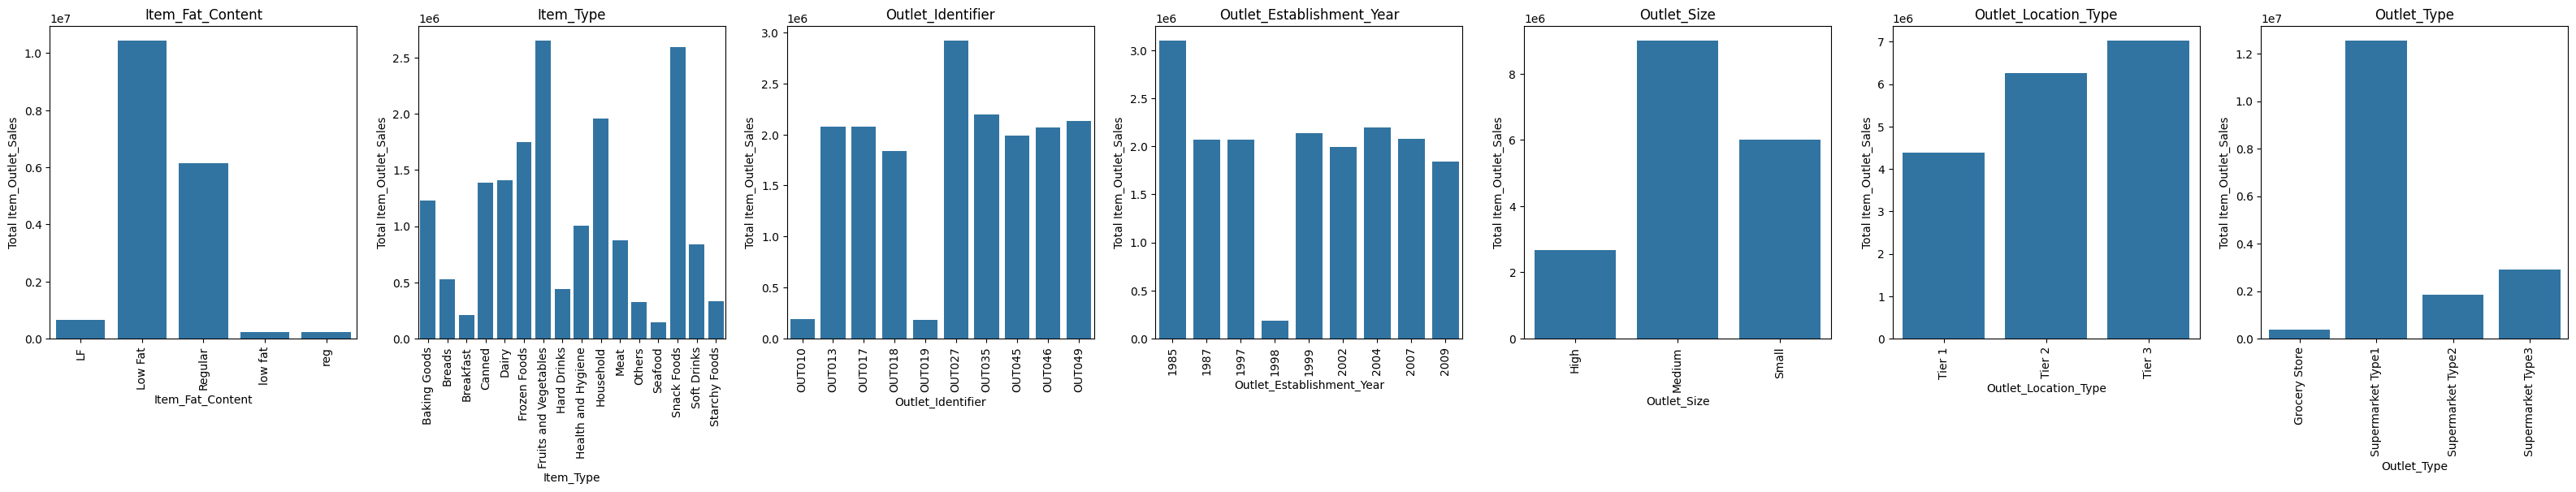

In [69]:
plt.figure(figsize = (40,5))

idx = 1

for idx,col in enumerate(categorical_columns):
    plt.subplot(1,7,idx+1)
    data=Imputed_sales_df.groupby(col).sum("Item_Outlet_Sales")
    sns.barplot(x = data.index,y = data.Item_Outlet_Sales)
    plt.title(col)
    plt.ylabel(f"Total Item_Outlet_Sales")
    plt.xticks(rotation = 90)                 
              


#### `Highest Total sales comes from : `
* Item with "Low Fat"
* "Fruits and Vegetables" and "Snack Foods" Item_Type
* "OUT027" Outlet_Identifier
* "Oldest" outlet (1985)
* "Medium" sized outlet 
* "Tier3" Outlet_location_Type 
* "Supermarket Type1" Outlet_Type 

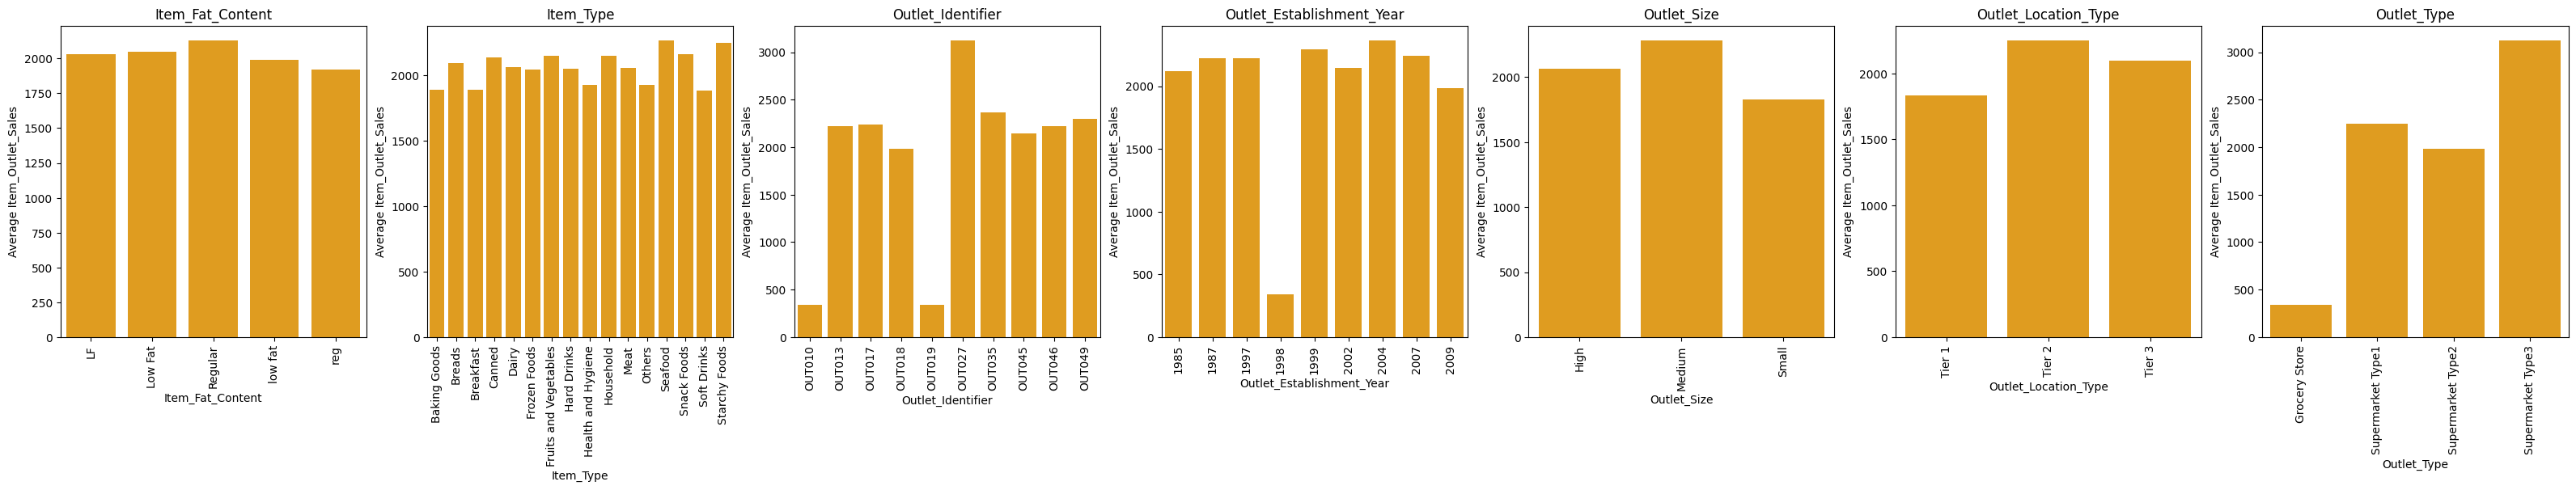

In [70]:
plt.figure(figsize = (40,5))

for idx,col in enumerate(categorical_columns):
    plt.subplot(1,7,idx+1)
    data=Imputed_sales_df.groupby(col).mean("Item_Outlet_Sales")
    sns.barplot(x = data.index,y = data.Item_Outlet_Sales,color="orange")
    plt.ylabel("Average Item_Outlet_Sales")
    plt.title(col)
    plt.xticks(rotation = 90)                   



#### `Based on  Average Price of items we deduce that : `
* In every categories are almost same for "Item_Fat_Content" and "Item_type"
* OUT027 "Outlet_Identifier" is most expensive and, OUT019 and OUT010 "Outlet_Identifier" are cheaper
* outlet established in 1998 is most cheaper
* SMALL outlize is more cheaper than HIGH and MEDIUM sized outlet
* TIER1 "outlet_location_type" is more cheaper than TIER2 and TIER3 
* "Grocery store" items are most cheaper and "Supermarket Type3" items are most expensive

## Multivariate Analysis

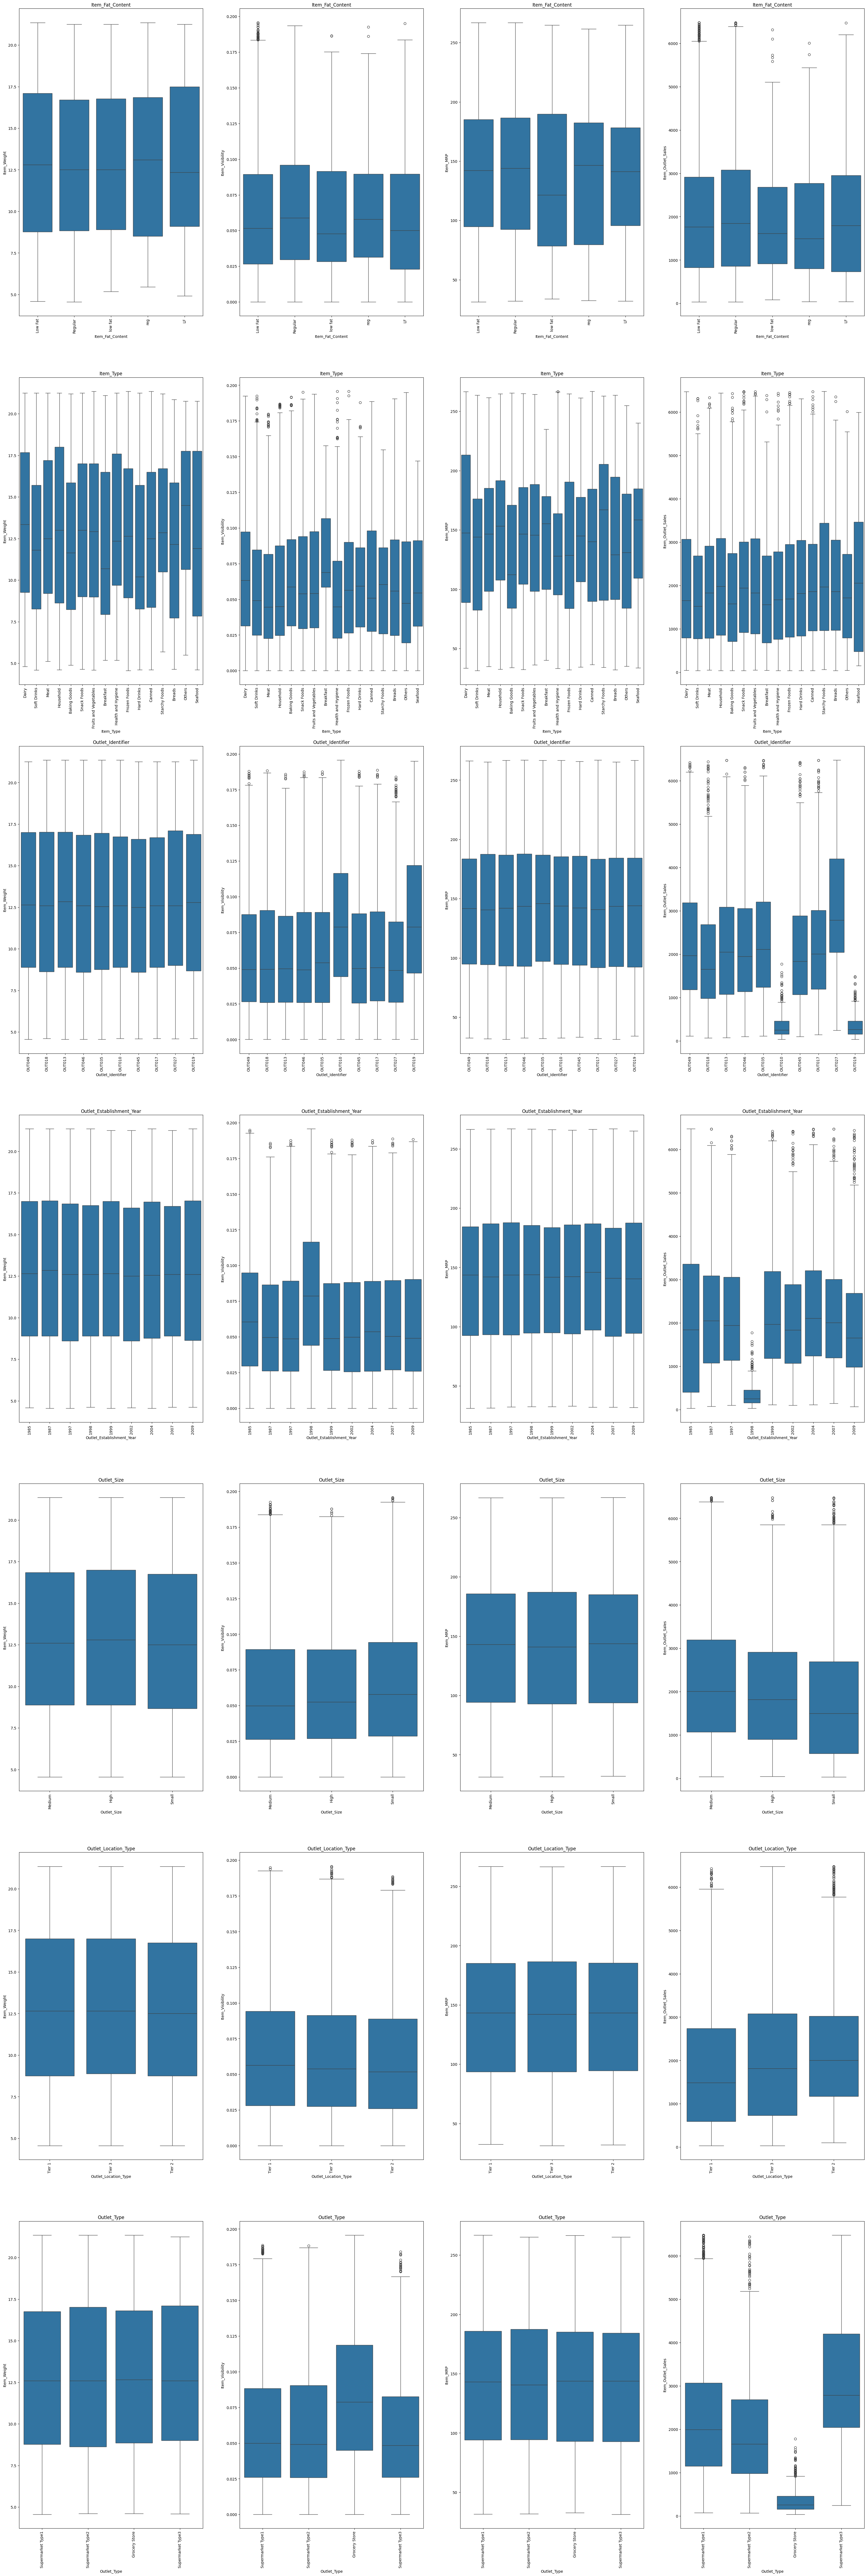

In [73]:
plt.figure(figsize = (40,120))

idx = 1

for cat_col in categorical_columns: 
    for num_col in numerical_columns:
        plt.subplot(7,4,idx)
        sns.boxplot(data = Imputed_sales_df,x = cat_col,y = num_col)
        plt.title(f"{cat_col}")
        plt.xticks(rotation = 90)                   

        idx+=1
 
                    


#### `From Above plot we deduced that more the visibilty of items less will be its sale, Below are most visible :`
* Grocery Store Outlet_type
* 1998 outlet_established
* OUT10 and OUT19 outlet_identifier
* Breakfast and Seafood Item_type

In [78]:
import pingouin as pg
from scipy import stats

In [80]:
all_welch_df  = []

for col in categorical_columns:
    welch_df = pg.welch_anova(dv="Item_Outlet_Sales", between=col,data = Imputed_sales_df)
    all_welch_df.append(welch_df)

pd.concat(all_welch_df)    

,Source,ddof1,ddof2,F,p-unc,np2
0,Item_Fat_Content,4,394.563730,1.721790,1.443094e-01,0.000818
0,Item_Type,15,1468.608867,2.790420,2.726869e-04,0.004696
0,Outlet_Identifier,9,3467.168986,1373.600219,0.000000e+00,0.236339
0,Outlet_Establishment_Year,8,3441.815877,1110.133130,0.000000e+00,0.098884
0,Outlet_Size,2,3669.495861,83.056579,5.267407e-36,0.019367
0,Outlet_Location_Type,2,5491.450991,53.923562,6.431146e-24,0.011711
0,Outlet_Type,3,2257.967217,4115.330146,0.000000e+00,0.234990


#### `Item_Fat_Content, Item_Type, Outlet_Size, and Outlet_Location_Type so not have same Item_Outlet_Sales among their categories`

In [85]:
# Outlet_Type
pg.pairwise_gameshowell(dv="Item_Outlet_Sales", between="Outlet_Type",data = Imputed_sales_df )


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Grocery Store,Supermarket Type1,339.828500,2248.956001,-1909.127501,20.171678,-94.643959,6654.790660,0.000000e+00,-1.500670
1,Grocery Store,Supermarket Type2,339.828500,1982.507030,-1642.678529,45.023029,-36.485295,986.386269,0.000000e+00,-1.752701
2,Grocery Store,Supermarket Type3,339.828500,3120.853118,-2781.024617,49.174736,-56.553931,983.889514,0.000000e+00,-2.704252
3,Supermarket Type1,Supermarket Type2,2248.956001,1982.507030,266.448972,48.044898,5.545833,1273.702784,2.127228e-07,0.193017
4,Supermarket Type1,Supermarket Type3,2248.956001,3120.853118,-871.897116,51.955690,-16.781552,1222.440522,3.714806e-13,-0.622788
5,Supermarket Type2,Supermarket Type3,1982.507030,3120.853118,-1138.346088,65.723438,-17.320246,1847.091166,0.000000e+00,-0.801958


In [84]:
# Outlet_Establishment_Year
pg.pairwise_gameshowell(dv="Item_Outlet_Sales", between="Outlet_Establishment_Year",data = Imputed_sales_df )


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1985,1987,2117.355953,2224.622824,-107.266871,65.312372,-1.642367,2303.744663,7.812231e-01,-0.065095
1,1985,1997,2117.355953,2224.791462,-107.435509,65.095000,-1.650442,2306.961863,7.765250e-01,-0.065332
2,1985,1998,2117.355953,339.351662,1778.004291,48.260915,36.841496,1627.865965,6.938894e-13,1.159192
3,1985,1999,2117.355953,2296.536065,-179.180112,66.128739,-2.709565,2276.901967,1.448618e-01,-0.107986
4,1985,2002,2117.355953,2143.069013,-25.713060,64.539464,-0.398408,2320.534666,9.999827e-01,-0.015713
5,1985,2004,2117.355953,2362.261264,-244.905311,65.748225,-3.724896,2288.261961,6.222158e-03,-0.148085
6,1985,2007,2117.355953,2242.365508,-125.009555,64.679103,-1.932766,2312.629540,5.908693e-01,-0.076319
7,1985,2009,2117.355953,1982.507030,134.848923,64.505967,2.090488,2320.013512,4.800652e-01,0.082437
8,1987,1997,2224.622824,2224.791462,-0.168638,64.105494,-0.002631,1859.936943,1.000000e+00,-0.000122
9,1987,1998,2224.622824,339.351662,1885.271162,46.917707,40.182508,1046.716261,0.000000e+00,1.694708


In [83]:
# Outlet_Identifier
pg.pairwise_gameshowell(dv="Item_Outlet_Sales", between="Outlet_Identifier",data = Imputed_sales_df )


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,OUT010,OUT013,339.351662,2224.622824,-1885.271162,46.917707,-40.182508,1046.716261,6.239453e-14,-1.694708
1,OUT010,OUT017,339.351662,2242.365508,-1903.013846,46.032072,-41.341042,1044.604946,8.727463e-13,-1.752433
2,OUT010,OUT018,339.351662,1982.507030,-1643.155368,45.788482,-35.885780,1048.159469,6.949996e-13,-1.519348
3,OUT010,OUT019,339.351662,340.329723,-0.978061,15.833268,-0.061773,1079.973249,1.000000e+00,-0.003745
4,OUT010,OUT027,339.351662,3120.853118,-2781.501456,49.876512,-55.767762,1036.391292,4.529710e-14,-2.341549
5,OUT010,OUT035,339.351662,2362.261264,-2022.909602,47.522568,-42.567346,1041.487632,0.000000e+00,-1.796938
6,OUT010,OUT045,339.351662,2143.069013,-1803.717351,45.835660,-39.351836,1049.025512,0.000000e+00,-1.664833
7,OUT010,OUT046,339.351662,2224.791462,-1885.439800,46.614637,-40.447377,1046.028935,2.565725e-13,-1.708764
8,OUT010,OUT049,339.351662,2296.536065,-1957.184403,48.047637,-40.734249,1038.980722,2.881029e-13,-1.718823
9,OUT013,OUT017,2224.622824,2242.365508,-17.742684,63.683135,-0.278609,1855.459639,9.999998e-01,-0.012921


## `From Welch Annova we can deduce that "Item_Fat_Content" does not have significant affect on "Item_Outlet_Sales" because of its all Class labels have does not have significant differences in sales as proved by p-unc is 0.1143 which is not less than 0.005` 

## `It can also proved from the mean sales difference between the "Item_Fat_Content" labels which have pvalue>0.005 which shows there sales is not significantly different`

## `Hence, We are dropping "Item_Fat_Content" Attribute` 


# Train validation split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
train,validation = train_test_split(Imputed_sales_df)

In [89]:
train.shape

(6392, 11)

In [90]:
validation.shape

(2131, 11)

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from scipy.stats import spearmanr
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [75]:
Item_Type_label_encoder = LabelEncoder()
Outlet_Identifier_label_encoder = LabelEncoder()
Establishment_Year_label_encoder = LabelEncoder()
Outlet_Type_label_encoder = LabelEncoder()

Imputed_sales_df['Item_Type'] = Item_Type_label_encoder.fit_transform(Imputed_sales_df['Item_Type'])
Imputed_sales_df['Outlet_Identifier'] = Outlet_Identifier_label_encoder.fit_transform(Imputed_sales_df['Outlet_Identifier'])
Imputed_sales_df['Establishment_Year'] = Establishment_Year_label_encoder.fit_transform(Imputed_sales_df['Establishment_Year'])
Imputed_sales_df['Outlet_Type'] = Outlet_Type_label_encoder.fit_transform(Imputed_sales_df['Outlet_Type'])

In [ ]:
nums_pipeline = Pipeline([
    ('st_scaler', StandardScaler()),
    ('minmaxscaler', MinMaxScaler())
])

cats_pipeline = Pipeline([
    ("O_Encoder", OrdinalEncoder())

])

full_pipeline = ColumnTransformer([
    ('nums', nums_pipeline, numerical_columns),
    ('cats', cats_pipeline, categorical_columns),
])

# Dividing into Independent and dependent features

In [279]:
x = combined_train[:,:-1]
y = combined_train[:,-1]

In [280]:
print(x.shape)
print(y.shape)

(6392, 33)
(6392,)


In [77]:
#Logistic Regression
linear_regression_model = LinearRegression()

#SGD Regressor
SGD_model = SGDRegressor()

#Ridge Regression
ridge_model = Ridge()

#Lasso Regression
lasso_model = Lasso()

#Elastic net regression
elastic_net_model = ElasticNet()

#KNN classifier
KNN_model = KNeighborsRegressor()

#DecisionTreeClassifier
dt_model = DecisionTreeRegressor()

#RandomForestClassifier
rf_model = RandomForestRegressor()

#Support Vector Machines (SVM)
svm_model = SVR()

#Naive Bayes:
GNB_model = GaussianNB()

#Gradient Boosting
GB_model = GradientBoostingRegressor()

#Neural Networks (Deep Learning)
dl_model = MLPRegressor()

# XG Boost
XGB_model = XGBRegressor()

# CatBoost
CB_model = CatBoostRegressor()

# lightgbm
LGBM_model = LGBMRegressor()


In [ ]:
linear_regression_model.fit(x,y)
ridge_model.fit(x,y)
lasso_model.fit(x,y)
elastic_net_model.fit(x,y)
KNN_model.fit(x,y)
dt_model.fit(x,y)
rf_model.fit(x,y)
svm_model.fit(x,y)
GNB_model.fit(x,y)
GB_model.fit(x,y)
dl_model.fit(x,y)
XGB_model.fit(x,y)
CB_model.fit(x,y)
LGBM_model.fit(x,y)

# Hyperparameter tuning ()

# Model Evaluation

In [357]:
numerical_validation = validation.select_dtypes(exclude='object')
numerical_validation.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
4161,18.850,0.137973,158.4578,2007,1444.1202
6681,8.210,0.010781,149.9392,1999,1938.8096
6039,9.420,0.000000,59.8904,1985,1757.7120
2270,7.655,0.031918,117.7492,1987,695.0952
6033,19.000,0.097510,48.1718,2002,709.0770


In [358]:
object_validation = validation.select_dtypes(include='object')
object_validation.head()

,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4161,Hard Drinks,OUT017,Medium,Tier 2,Supermarket Type1
6681,Hard Drinks,OUT049,Medium,Tier 1,Supermarket Type1
6039,Starchy Foods,OUT027,Medium,Tier 3,Supermarket Type3
2270,Canned,OUT013,High,Tier 3,Supermarket Type1
6033,Frozen Foods,OUT045,Medium,Tier 2,Supermarket Type1


In [359]:
nominal_validation = object_validation.iloc[:,:2]
nominal_validation.head()

,Item_Type,Outlet_Identifier
4161,Hard Drinks,OUT017
6681,Hard Drinks,OUT049
6039,Starchy Foods,OUT027
2270,Canned,OUT013
6033,Frozen Foods,OUT045


In [360]:
ordinal_validation = object_validation.iloc[:,2:]
ordinal_validation.head()

,Outlet_Size,Outlet_Location_Type,Outlet_Type
4161,Medium,Tier 2,Supermarket Type1
6681,Medium,Tier 1,Supermarket Type1
6039,Medium,Tier 3,Supermarket Type3
2270,High,Tier 3,Supermarket Type1
6033,Medium,Tier 2,Supermarket Type1


In [361]:
standardized_numerical_validation = standardizer.transform(numerical_validation)
standardized_numerical_validation

array([[ 1.29612248,  1.60195002,  0.27671323,  1.0930942 , -0.4279331 ],
       [-0.99454625, -1.15993941,  0.14077037,  0.13529052, -0.13784526],
       [-0.73404727, -1.39404536, -1.29626056, -1.54086593, -0.24404161],
       ...,
       [ 0.65025724,  0.10614514,  1.2383447 ,  0.73391782, -0.63642154],
       [-0.04943011,  0.5045861 , -0.49782564,  0.73391782, -0.88590489],
       [-1.0289924 , -1.39404536,  1.85829497, -1.30141501,  1.74714009]])

In [362]:
ohe_nominal_validation = ohe.transform(nominal_validation)
ohe_nominal_validation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [363]:
oe_ordinal_validation = oe.transform(ordinal_validation)
oe_ordinal_validation

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 2., 3.],
       ...,
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 2., 1.]])

In [364]:
encoded_object_validation = np.concatenate((ohe_nominal_validation,oe_ordinal_validation),axis=1)
encoded_object_validation

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 2., 3.],
       ...,
       [0., 1., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 2., 1., 1.],
       [0., 0., 0., ..., 0., 2., 1.]])

In [365]:
combined_validation = np.concatenate((encoded_object_validation,standardized_numerical_validation),axis=1)
combined_validation

array([[ 0.        ,  0.        ,  0.        , ...,  0.27671323,
         1.0930942 , -0.4279331 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.14077037,
         0.13529052, -0.13784526],
       [ 0.        ,  0.        ,  0.        , ..., -1.29626056,
        -1.54086593, -0.24404161],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  1.2383447 ,
         0.73391782, -0.63642154],
       [ 0.        ,  0.        ,  0.        , ..., -0.49782564,
         0.73391782, -0.88590489],
       [ 0.        ,  0.        ,  0.        , ...,  1.85829497,
        -1.30141501,  1.74714009]])

In [366]:
from sklearn.metrics import mean_squared_error,r2_score

In [367]:
x = combined_validation[:,:-1]
y = combined_validation[:,-1]

In [368]:
predications = dtr.predict(x)
predications

array([ 0.28646342,  0.1974217 ,  0.3269895 , ...,  0.7978861 ,
       -0.07266697,  1.25549819])

In [369]:
r2_score(y,predications)

0.566817213707213

In [354]:
mean_squared_error(y,predications)**1/2

0.21741521591198368

# Reverse Transforming Predictions

In [226]:
predications.shape

(2131,)

In [307]:
reshaped_predictions = predications.reshape(-1,1)
reshaped_predictions.shape

(2131, 1)

In [308]:
x[:,-4:].shape

(2131, 4)

In [309]:
validation_predictions = np.concatenate((x[:,-4:],reshaped_predictions),axis=1)
validation_predictions

array([[ 1.29612248,  1.60195002,  0.27671323,  1.0930942 ,  0.79527715],
       [-0.99454625, -1.15993941,  0.14077037,  0.13529052,  0.47434551],
       [-0.73404727, -1.39404536, -1.29626056, -1.54086593, -0.25809701],
       ...,
       [ 0.65025724,  0.10614514,  1.2383447 ,  0.73391782,  1.55114534],
       [-0.04943011,  0.5045861 , -0.49782564,  0.73391782,  0.60474839],
       [-1.0289924 , -1.39404536,  1.85829497, -1.30141501,  1.14900472]])

In [310]:
inverse_transformed = standardizer.inverse_transform(validation_predictions)
inverse_transformed.shape

(2131, 5)

In [311]:
inverse_transformed[:,-1]

array([3530.0716, 2982.784 , 1733.7432, ..., 4819.0604, 3205.1612,
       4133.2864])